<a href="https://colab.research.google.com/github/calmrocks/master-machine-learning-engineer/blob/main/BasicConcepts/ActivationFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Activation Functions in Neural Networks

## Introduction
Activation functions are crucial components in neural networks that introduce non-linearity into the network's output. They determine whether a neuron should be activated ("fired") or not based on the weighted sum of inputs.

Key aspects we'll cover:
1. Why we need activation functions
2. Common types of activation functions
3. Properties and use cases
4. Visualization and comparison

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F

## 1. Linear vs Non-linear Activation Functions

Without activation functions (or with only linear activation), a neural network would just be a linear regression model, regardless of its depth. Let's visualize this concept:

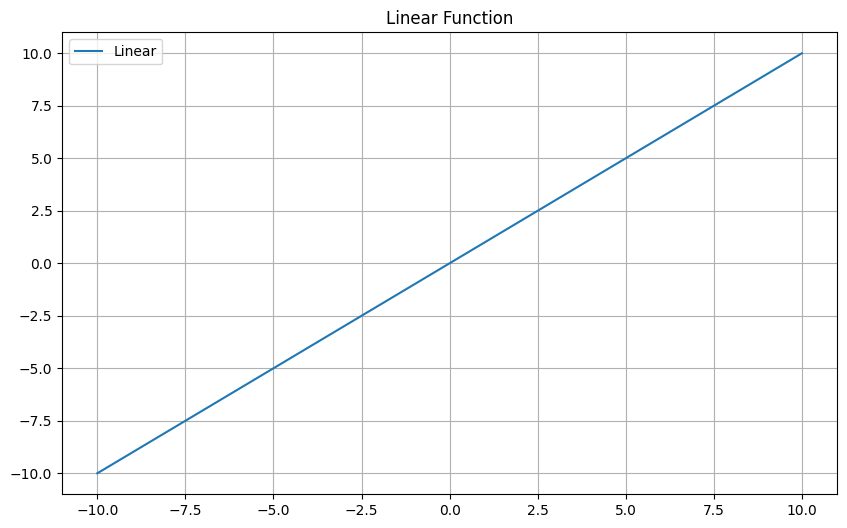

Problem with linear activation:
- No matter how many layers we stack, the output remains linear
- Cannot learn complex patterns


In [2]:
# Create input data
x = np.linspace(-10, 10, 100)

# Linear function
def linear(x):
    return x

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, linear(x), label='Linear')
plt.title('Linear Function')
plt.grid(True)
plt.legend()
plt.show()

print("Problem with linear activation:")
print("- No matter how many layers we stack, the output remains linear")
print("- Cannot learn complex patterns")

## 2. Common Activation Functions

Let's implement and visualize the most common activation functions:
1. Sigmoid
2. Tanh
3. ReLU
4. Leaky ReLU
5. ELU

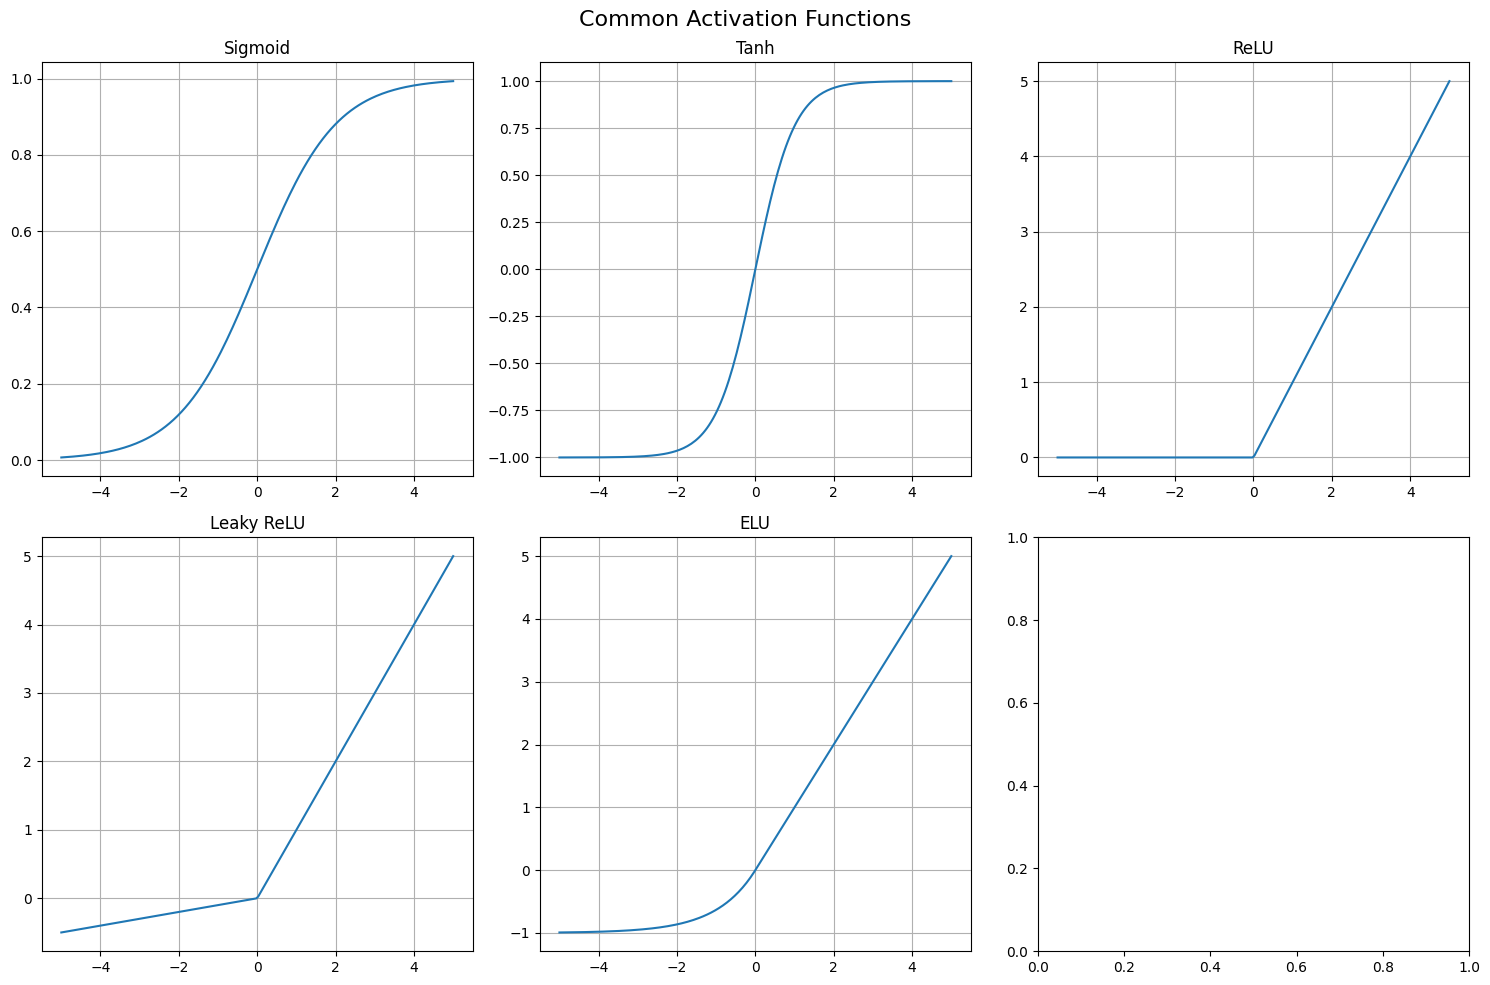

In [3]:
def plot_activation_functions(x):
    # Define activation functions
    sigmoid = 1 / (1 + np.exp(-x))
    tanh = np.tanh(x)
    relu = np.maximum(0, x)
    leaky_relu = np.where(x > 0, x, 0.1 * x)
    elu = np.where(x > 0, x, np.exp(x) - 1)

    # Create subplot
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Common Activation Functions', fontsize=16)

    # Plot each activation function
    axes[0, 0].plot(x, sigmoid)
    axes[0, 0].set_title('Sigmoid')
    axes[0, 0].grid(True)

    axes[0, 1].plot(x, tanh)
    axes[0, 1].set_title('Tanh')
    axes[0, 1].grid(True)

    axes[0, 2].plot(x, relu)
    axes[0, 2].set_title('ReLU')
    axes[0, 2].grid(True)

    axes[1, 0].plot(x, leaky_relu)
    axes[1, 0].set_title('Leaky ReLU')
    axes[1, 0].grid(True)

    axes[1, 1].plot(x, elu)
    axes[1, 1].set_title('ELU')
    axes[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

# Generate input data and plot
x = np.linspace(-5, 5, 200)
plot_activation_functions(x)

## 3. Properties of Different Activation Functions

### Sigmoid
- Output range: (0, 1)
- Used in output layer for binary classification
- Suffers from vanishing gradient problem

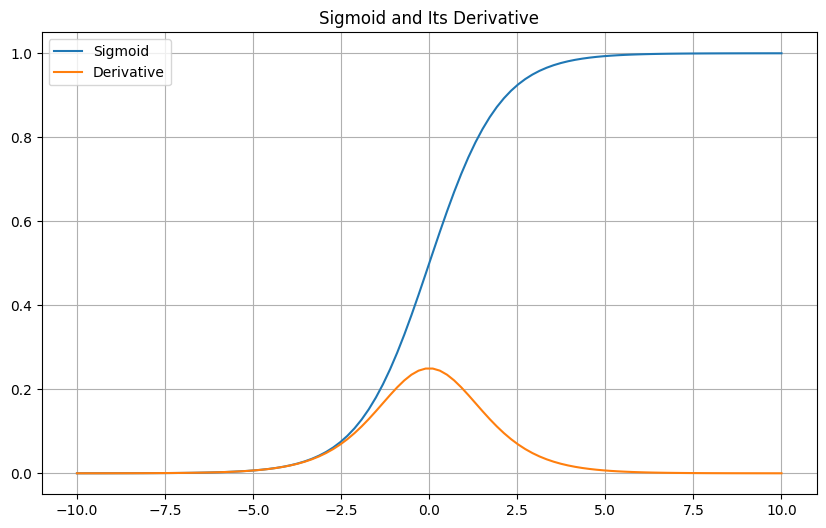

In [4]:
# Demonstrate vanishing gradient problem with sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

x = np.linspace(-10, 10, 100)
plt.figure(figsize=(10, 6))
plt.plot(x, sigmoid(x), label='Sigmoid')
plt.plot(x, sigmoid_derivative(x), label='Derivative')
plt.title('Sigmoid and Its Derivative')
plt.grid(True)
plt.legend()
plt.show()

### ReLU (Rectified Linear Unit)
- Most commonly used in modern networks
- Helps solve vanishing gradient problem
- Simple and computationally efficient

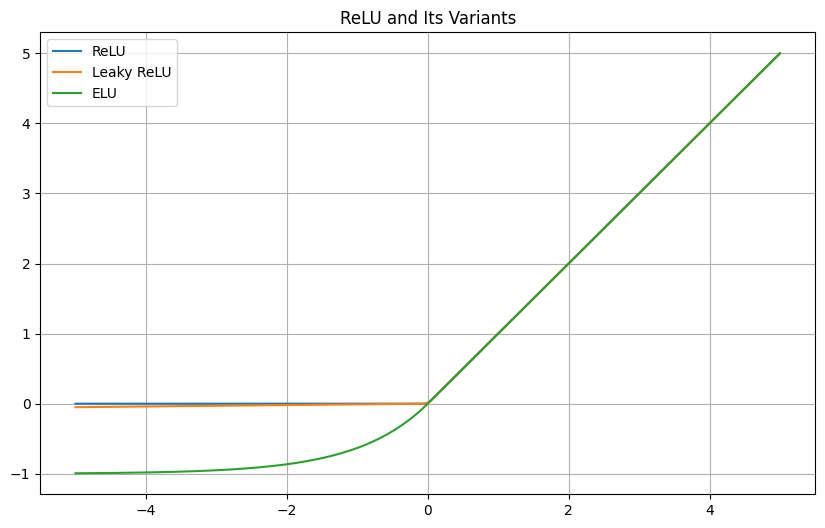

In [5]:
# Compare ReLU with other variants
def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

x = np.linspace(-5, 5, 200)
plt.figure(figsize=(10, 6))
plt.plot(x, relu(x), label='ReLU')
plt.plot(x, leaky_relu(x), label='Leaky ReLU')
plt.plot(x, elu(x), label='ELU')
plt.title('ReLU and Its Variants')
plt.grid(True)
plt.legend()
plt.show()

## 4. Practical Example: Impact of Activation Functions

Let's create a simple neural network with different activation functions and compare their performance:

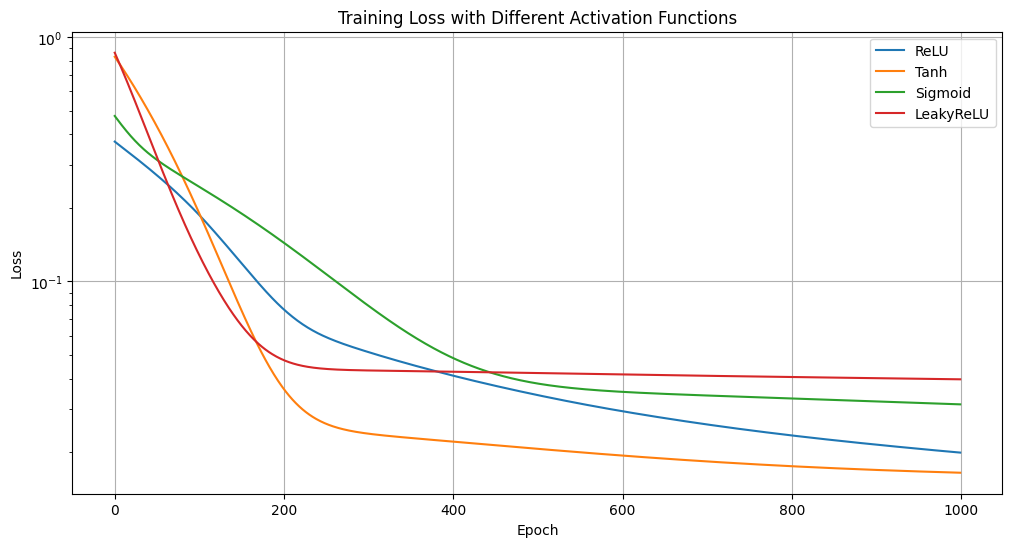

In [6]:
import torch.nn as nn

# Generate synthetic data
np.random.seed(42)
X = np.random.randn(1000, 1)
y = np.sin(X) + np.random.normal(0, 0.1, (1000, 1))

# Convert to PyTorch tensors
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

# Define networks with different activation functions
class SimpleNet(nn.Module):
    def __init__(self, activation):
        super().__init__()
        self.fc1 = nn.Linear(1, 10)
        self.activation = activation
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x

# Create models with different activation functions
models = {
    'ReLU': SimpleNet(nn.ReLU()),
    'Tanh': SimpleNet(nn.Tanh()),
    'Sigmoid': SimpleNet(nn.Sigmoid()),
    'LeakyReLU': SimpleNet(nn.LeakyReLU())
}

# Training function
def train_model(model, X, y, epochs=1000):
    optimizer = torch.optim.Adam(model.parameters())
    criterion = nn.MSELoss()
    losses = []

    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

    return losses

# Train and plot results
plt.figure(figsize=(12, 6))
for name, model in models.items():
    losses = train_model(model, X_tensor, y_tensor)
    plt.plot(losses, label=name)

plt.title('Training Loss with Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.yscale('log')
plt.grid(True)
plt.show()

## 5. Guidelines for Choosing Activation Functions

1. **Hidden Layers**:
   - ReLU is generally the best default choice
   - Consider Leaky ReLU if dying ReLU is an issue
   - ELU can provide better performance but is more computationally expensive

2. **Output Layer**:
   - Binary classification: Sigmoid
   - Multi-class classification: Softmax
   - Regression: Linear (no activation)

3. **Considerations**:
   - Computational efficiency
   - Gradient behavior
   - Range of outputs needed
   - Type of problem (classification vs regression)

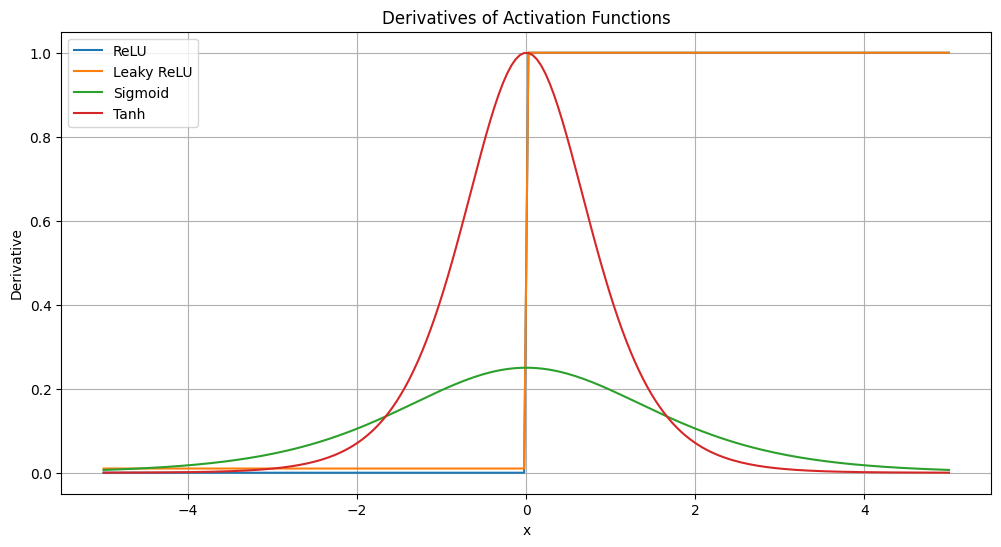

In [7]:
# Visualization of activation function derivatives
def plot_derivatives():
    x = np.linspace(-5, 5, 200)

    derivatives = {
        'ReLU': np.where(x > 0, 1, 0),
        'Leaky ReLU': np.where(x > 0, 1, 0.01),
        'Sigmoid': sigmoid(x) * (1 - sigmoid(x)),
        'Tanh': 1 - np.tanh(x)**2
    }

    plt.figure(figsize=(12, 6))
    for name, der in derivatives.items():
        plt.plot(x, der, label=name)

    plt.title('Derivatives of Activation Functions')
    plt.xlabel('x')
    plt.ylabel('Derivative')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_derivatives()

## Summary

- Activation functions are essential for learning non-linear patterns
- ReLU is generally the best default choice for hidden layers
- Different activation functions have different properties and use cases
- Choice of activation function can significantly impact model performance
- Consider the problem type and computational requirements when choosing